In [1]:
import pandas as pd
import numpy as np
import random
import numpy as np
from deap import base, creator, tools, algorithms
import datetime
from reportlab.lib.pagesizes import A4
from reportlab.platypus import SimpleDocTemplate, Table, TableStyle, Paragraph
from reportlab.lib import colors
from reportlab.lib.styles import getSampleStyleSheet
import numpy as np
from deap import base, creator

data = [
    [1, "Lunes 08:00", "Lunes 09:00", 30, 0, "Preparar Desayuno"],
    [2, "Lunes 09:00", "Lunes 9:30", 30, 0, "Llevar a los niños", "1"],
    [3, "Lunes 08:00", "Lunes 20:30", 30, 0, "Revisar Correos"],
    [4, "Lunes 08:00", "Lunes 14:00", 240, 0, "Cirugía", "3"],
    [5, "Lunes 08:00", "Lunes 18:00", 30, 0, "Hacer Ejercicio"],
    [6, "Martes 10:00", "Domingo 17:00", 60, 0, "Comprar regalo abuelos"],
    [7, "Lunes 16:00", "Lunes 20:30", 60, 0, "Hacer Cena"],
    [8, "Martes 08:00", "Martes 09:00", 30, 0, "Preparar Desayuno"],
    [9, "Martes 10:00", "Domingo 17:00", 90, 0, "Visitar a los abuelos", "6"],
    [10, "Martes 08:00", "Martes 20:30", 30, 0,  "Revisar Correos"],
    [11, "Martes 13:00", "Martes 20:00", 240, 0, "Cirugía", "10"],
    [12, "Martes 08:00", "Martes 10:00", 30,0, "Correr"],
    [13, "Martes 16:00", "Martes 17:00", 60, 0, "Recoger a los niños"],
    [14, "Martes 08:00", "Miércoles 12:30", 90, 1, "Comprar por internet"],
    [15, "Miércoles 08:00", "Miércoles 09:00", 30, 0, "Preparar Desayuno"],
    [16, "Miércoles 09:00", "Miércoles 09:30", 30, 0, "Llevar a los niños", "15"],
    [17, "Martes 08:00", "Jueves 10:30", 120, 1, "Planear conferencia universidad"],
    [18, "Miércoles 08:00", "Miércoles 21:00", 60, 1, "Meditar"],
    [19, "Miércoles 08:00", "Miércoles 21:00", 120, 0, "Comprar supermercado"],
    [20, "Lunes 08:00", "Sábado 14:00", 60, 0, "Comprar entradas fútbol"],
    [21, "Lunes 08:00", "Sábado 14:00", 60, 0, "Comprar camisetas fútbol"],
    [22, "Lunes 08:00", "Sábado 14:00", 30, 0,  "Hacer bocadillos"],
    [23, "Sábado 17:00", "Sábado 19:00", 120, 0, "Ver Real Madrid", "20,21,22"],
    [24, "Jueves 08:00", "Jueves 14:00", 90, 1, "Hacer comida"],
    [25, "Jueves 08:00", "Jueves 20:00", 300, 0, "Cirugía", "31"],
    [26, "Jueves 08:00", "Jueves 22:00", 60, 1, "Hacer Ejercicio", "25"],
    [27, "Jueves 15:00", "Jueves 22:30", 30, 0, "Leer Cuentos"],
    [28, "Jueves 12:00", "Jueves 21:30", 60, 1, "Cortar el cesped"],
    [29, "Viernes 08:00", "Viernes 09:00", 30, 0, "Preparar Desayuno"],
    [30, "Viernes 09:00", "Viernes 09:30", 30, 0,"Llevar a los niños", "29"],
    [31, "Jueves 10:00", "Jueves 14:00", 60, 0, "Revisión paciente",],
    [32, "Martes 08:00", "Jueves 10:30", 240, 1, "Estudiar guión conferencia", "17"],
    [33, "Jueves 11:00", "Viernes 14:00", 60, 0, "Conferencia universidad", "32"],    
    [34, "Lunes 08:00", "Viernes 20:00", 300, 1, "Revisar clases grabadas",],
    [35, "Lunes 08:00", "Viernes 20:00", 120, 1, "Hacer apuntes para el examen",],
    [36, "Lunes 08:00", "Viernes 20:00", 300, 1, "Estudiar para el examen",],
    [37, "Viernes 20:00", "Viernes 22:30", 150, 0, "Examen",],
]

columns = ["ID", "Fecha Inicial", "Fecha Límite", "Duración (min)", "Divisible", "Nombre de la Tarea", "Tareas Dependientes"]

tareas_df = pd.DataFrame(data, columns=columns)

tareas_df.head(40)


,ID,Fecha Inicial,Fecha Límite,Duración (min),Divisible,Nombre de la Tarea,Tareas Dependientes
0,1,Lunes 08:00,Lunes 09:00,30,0,Preparar Desayuno,None
1,2,Lunes 09:00,Lunes 9:30,30,0,Llevar a los niños,1
2,3,Lunes 08:00,Lunes 20:30,30,0,Revisar Correos,None
3,4,Lunes 08:00,Lunes 14:00,240,0,Cirugía,3
4,5,Lunes 08:00,Lunes 18:00,30,0,Hacer Ejercicio,None
5,6,Martes 10:00,Domingo 17:00,60,0,Comprar regalo abuelos,None
6,7,Lunes 16:00,Lunes 20:30,60,0,Hacer Cena,None
7,8,Martes 08:00,Martes 09:00,30,0,Preparar Desayuno,None
8,9,Martes 10:00,Domingo 17:00,90,0,Visitar a los abuelos,6
9,10,Martes 08:00,Martes 20:30,30,0,Revisar Correos,None


In [2]:
def index_to_date(index, only_hour=False):
    days = ["Lunes", "Martes", "Miércoles", "Jueves", "Viernes", "Sábado", "Domingo"]
    start_time = datetime.datetime.strptime("08:00", "%H:%M")
    time_increment = datetime.timedelta(minutes=30)
    day_increment = datetime.timedelta(days=1)
    
    day_index = index // 30
    time_index = index % 30
    
    if time_index > 11:
        time_index += 2
        
    date = start_time + (day_index * day_increment) + time_index * time_increment
    
    if only_hour:
        return  f"{date.strftime('%H:%M')}"
    
    return f"{days[date.weekday()]} {date.strftime('%H:%M')}"

def date_to_index(date_str):
    days = ["Lunes", "Martes", "Miércoles", "Jueves", "Viernes", "Sábado", "Domingo"]
    start_time = datetime.datetime.strptime("08:00", "%H:%M")
    time_increment = datetime.timedelta(minutes=30)
    day_increment = datetime.timedelta(days=1)
    
    day_str, time_str = date_str.split(' ')
    day_index = days.index(day_str)
    time_parts = time_str.split(':')
    time_index = (int(time_parts[0]) - start_time.hour) * 2 + int(time_parts[1]) // 30
    
    if time_index > 11:
        time_index -= 2
    
    index = (day_index * 30) + time_index
    
    return index

In [3]:
tareas_df["Fecha Inicial"] = tareas_df["Fecha Inicial"].apply(date_to_index)
tareas_df["Fecha Límite"] = tareas_df["Fecha Límite"].apply(date_to_index)
tareas_df["Duración (min)"] = tareas_df["Duración (min)"].apply(lambda x: int(x/30))
tareas_df["Tareas Dependientes"] = tareas_df["Tareas Dependientes"].apply(lambda x: [int(y) for y in x.split(',')] if x is not None else x)

tareas_df.head(40)


,ID,Fecha Inicial,Fecha Límite,Duración (min),Divisible,Nombre de la Tarea,Tareas Dependientes
0,1,0,2,1,0,Preparar Desayuno,None
1,2,2,3,1,0,Llevar a los niños,[1]
2,3,0,23,1,0,Revisar Correos,None
3,4,0,10,8,0,Cirugía,[3]
4,5,0,18,1,0,Hacer Ejercicio,None
5,6,34,196,2,0,Comprar regalo abuelos,None
6,7,14,23,2,0,Hacer Cena,None
7,8,30,32,1,0,Preparar Desayuno,None
8,9,34,196,3,0,Visitar a los abuelos,[6]
9,10,30,53,1,0,Revisar Correos,None


In [4]:
def count_zeros_backwards(arr, start_position):
    count = 0
    for i in range(start_position, start_position-30, -1):
        if arr[i] == 0:
            count += 1
        else:
            break
    if count > 30:
        return 30
    return count

def compare_to_utopia(solution):
    """
    Revisar
    """
    distance_to_max_utopia = np.max(solution.fitness.values)
    distance_to_min_utopia = np.min(solution.fitness.values)
    total_distance_to_utopia = distance_to_max_utopia + distance_to_min_utopia
    return total_distance_to_utopia


def is_last_occurrence(array, number):
    last_index = len(array) - 1
    if number in array:
        return array.index(number) == last_index - array[::-1].index(number)
    
    return False

def count_zeros_between_non_zeros(array):
    total_zeros = 0
    chunk_size = len(array) // 7

    for i in range(0, len(array), chunk_size):
        chunk = array[i:i + chunk_size]
        first_non_zero_index = next((index for index, num in enumerate(chunk) if num != 0), None)
        last_non_zero_index = next((index for index, num in enumerate(chunk[::-1]) if num != 0), None)

        if first_non_zero_index is not None and last_non_zero_index is not None:
            last_non_zero_index = chunk_size - 1 - last_non_zero_index
            zeros_between = chunk[first_non_zero_index + 1:last_non_zero_index].count(0)
            total_zeros += zeros_between

    return total_zeros

def check_apariciones_contiguas(array, numero):
    indices = [i for i, num in enumerate(array) if num == numero]
    
    for i in range(1, len(indices)):
        if indices[i] != indices[i - 1] + 1:
            return False
    
    return True

def fitness_function_with_penalties(planificacion, tareas_df):
    """
    Recorrer la planificacion y comparando con el df saber el número de tareas completadas correctamente y devolver recompensa por cada una completada correctamente.
    Para estar completada correctamente deberá tener la duración deseada, empezar despues de la fecha inicial y terminar antes de la final, además de haber sido complicadas las dependientes.
    
    También se devolverá el tiempo entre tareas. De tal manera que se devolverá el tiempo muerto entre las tareas de un mismo día teniendo que minimizar el mismo.
    """
    tareas_completadas = set()
    tareas_incompletas = set()

    recompensa_tareas = 0
    recompensa_individual = 0
    
    for index, tarea in enumerate(planificacion):
        if tarea != 0 and (tarea not in tareas_completadas and tarea not in tareas_incompletas):
            completed = True
            recompensa_individual = 0
            
            tarea_info = tareas_df[tareas_df.ID == tarea].iloc[0]
            duracion_info = tarea_info["Duración (min)"]
            start_info = tarea_info["Fecha Inicial"]
            divisible = tarea_info["Divisible"]
            end_info = tarea_info["Fecha Límite"]
            tareas_dependientes = tarea_info["Tareas Dependientes"]
            
            # Comprobar duracion
            if planificacion.count(tarea) == duracion_info:
                recompensa_individual += 1
            else:
                completed = False

            # Comprobar rango
            within_start_range = all(start_info <= i for i, num in enumerate(planificacion) if num == tarea)
            within_end_range = all(i <= end_info for i, num in enumerate(planificacion) if num == tarea)
            
                
            if within_start_range:
                recompensa_individual += 1
            else:
                completed = False
            if within_end_range:
                recompensa_individual += 1
            else:
                completed = False
            
            if tareas_dependientes == None or set(tareas_dependientes).issubset(tareas_completadas):
                recompensa_individual += 1
            else:
                completed = False
                
            if completed:
                if (not check_apariciones_contiguas(planificacion, tarea) and not divisible):
                    recompensa_individual += 1
                else:
                    recompensa_individual += 6
                tareas_completadas.add(tarea)
            else:
                tareas_incompletas.add(tarea)
            recompensa_tareas += recompensa_individual

        recompensa_tiempo = count_zeros_between_non_zeros(planificacion) * 30
        
    
    return recompensa_tareas, recompensa_tiempo

In [5]:
def substitute_task(planificacion, tarea_info, indice):
    
    duracion = tarea_info["Duración (min)"]

    if indice + duracion + 1 < len(planificacion):
            if planificacion[indice] != 0:
                #Eliminar tarea completa si no es 0
                for i in range(indice - 1, -1, -1):
                    if planificacion[i] == planificacion[indice]:
                        planificacion[i] = 0
                    else:
                        break
                    if planificacion[i] != 0:
                        break

            for i in range(indice, indice + duracion + 1):
                if planificacion[i] != 0:
                    j = i
                    
                    while j < len(planificacion)-1 and planificacion[j] == planificacion[j + 1]:
                        planificacion[j] = 0
                        j += 1
                    if j == len(planificacion) - 1:
                        planificacion[j] = 0
                planificacion[i] = tarea_info["ID"]
                
    return planificacion

def substitute_task_without_removing(planificacion, tarea_info, indice):
    
    duracion = tarea_info["Duración (min)"]

    if indice + duracion + 1 < len(planificacion):
        for i in range(indice, indice + duracion + 1):
            planificacion[i] = tarea_info["ID"]
                
    return planificacion


# Función para generar una población inicial aleatoria
def generate_initial_population_common2():
    """
    Generar planificacion inicial con un número aleatorio de tareas puestas en posiciones aleatorias.
    """
    initial_population = []

    for _ in range(POPULATION_SIZE):
        individual = creator.Individual([0] * 210)  # Inicializar con ceros

        array_length = np.random.randint(35, 38)
        
        all_ids = set(tareas_df['ID'])
        
        for i in range(array_length):
            excluded_ids = set(individual)
            available_ids = list(all_ids - excluded_ids)
            if len(available_ids) == 0:
                available_ids = list(all_ids)
                
            tarea_info = tareas_df[tareas_df.ID == random.choice(available_ids)].iloc[0]
            individual = substitute_task_without_removing(individual, tarea_info, np.random.randint(0, 210))

        initial_population.append(individual)

    return initial_population

def generate_initial_population_common():
    """
    Generar planificacion inicial con un número aleatorio de tareas puestas en posiciones aleatorias.
    """
    initial_population = []
    all_ids = set(tareas_df['ID'])

    for _ in range(POPULATION_SIZE):
        individual = creator.Individual([0] * 210)  # Inicializar con ceros
        
        for i in range(210):
            if random.random() < 0.15:  # 20% de posicionar un 0
                individual[i] = 0
            else: 
                individual[i] = random.choice(list(all_ids))
                
                tarea_info = tareas_df[tareas_df.ID == individual[i]].iloc[0]
                start_info = tarea_info["Fecha Inicial"]
                end_info = tarea_info["Fecha Límite"]

                if start_info > i: 
                    individual[i] = 0

                if end_info < i:
                    individual[i] = 0
                
                
        initial_population.append(individual)

    return initial_population

def mutate_common2(planificacion):
    """
    Realizar mutacion teniendo en cuenta la probabilidad en la que se escoge un sitio aleatorio de la planificación.
    En el caso de que la tarea entre completamente en el espacio, se añadirá la tarea.
    En caso de no entrar la tarea, se eliminarán las tareas necesarias para hacer sitio a la misma y se pondrá en ese espacio.
    """
    max_indices = random.randint(2, 4)
    indices_aleatorios = random.choices(list(range(len(planificacion))), k=max_indices)

    all_ids = set(tareas_df['ID'])

    for indice in indices_aleatorios:
        
        tarea_info = tareas_df[tareas_df.ID == random.choice(list(all_ids))].iloc[0]
        
        if random.random() < 0.3:  # 20% de posicionar un 0
            if planificacion[indice] != 0:
                tarea_info = tareas_df[tareas_df.ID == planificacion[indice]].iloc[0]
                start_info = tarea_info["Fecha Inicial"]
                end_info = tarea_info["Fecha Límite"]

                if start_info > indice: 
                    planificacion[indice] = 0

                if end_info < indice:
                    planificacion[indice] = 0
        else:
            planificacion = substitute_task(planificacion, tarea_info, indice)

    return (planificacion,)

def mutate_common(planificacion):
    """
    Realizar mutación teniendo en cuenta la probabilidad en la que se escoge un sitio aleatorio de la planificación.
    En el caso de que la tarea entre completamente en el espacio, se añadirá la tarea.
    En caso de no entrar la tarea, se eliminarán las tareas necesarias para hacer sitio a la misma y se pondrá en ese espacio.
    """
    max_indices = random.randint(2, 4)  # Número aleatorio entre 2 y 4
    indices_aleatorios = random.sample(range(len(planificacion)), max_indices)  # Usamos random.sample para obtener índices únicos

    all_ids = set(tareas_df['ID'])

    for indice in indices_aleatorios:

        tarea_info_ID = tareas_df[tareas_df.ID == random.choice(list(all_ids))].iloc[0].ID

        planificacion[indice] = tarea_info_ID
        tarea_info = tareas_df[tareas_df.ID == planificacion[indice]].iloc[0]
        start_info = tarea_info["Fecha Inicial"]
        duracion = tarea_info["Duración (min)"]
        end_info = tarea_info["Fecha Límite"]

        aux = indice
        while aux < indice + duracion and aux < 210:
            if random.random() < 0.75:
                planificacion[aux] = tarea_info_ID
                aux += 1
            else:
                # Deshacer los cambios hechos en el bucle while
                for i in range(indice, aux):
                    planificacion[i] = 0
                break

        if start_info > indice or end_info < indice:
            for i in range(aux - 1, indice - 1, -1):
                planificacion[i] = 0
            
                
    return (planificacion,)

In [6]:
def add_task(planificacion, tarea_info, indice):
    duracion = tarea_info["Duración (min)"]
    divisible = tarea_info["Divisible"]
    
    start_info = tarea_info["Fecha Inicial"]
    end_info = tarea_info["Fecha Límite"]
    indice = random.randint(start_info, end_info)
    
    plan_len = len(planificacion)
    counter = 0
    aux = 0
    indice_aux = indice
    if divisible:
        while counter < duracion:
            if planificacion[(indice + aux) % plan_len] == 0:
                planificacion[(indice + aux) % plan_len] = tarea_info["ID"]
                counter += 1
            else:
                aux += 1
            if indice+aux > plan_len *2:
                planificacion = remove_task(planificacion, indice_aux)
                return planificacion
    else:
        while counter < duracion:
            if planificacion[(indice + counter) % plan_len] == 0:
                counter += 1
            else:
                counter = 0
                indice += 1
            if indice > plan_len *2:
                planificacion = remove_task(planificacion, indice_aux)
                return planificacion
    
        for i in range(duracion):
            planificacion[(indice + i) % plan_len] = tarea_info["ID"]

    return planificacion

def remove_task(planificacion, indice):
    if planificacion[indice] != 0:
        tarea_a_eliminar = planificacion[indice]
        tarea_info = tareas_df[tareas_df.ID == tarea_a_eliminar].iloc[0]
        divisible = tarea_info["Divisible"]
  
        for i in range(len(planificacion)):
            if planificacion[i] == tarea_a_eliminar:
                planificacion[i] = 0

    return planificacion

# Función para generar una población inicial aleatoria
def generate_initial_population():
    """
    Generar planificacion inicial con un número aleatorio de tareas puestas en posiciones aleatorias.
    """
    initial_population = []

    for _ in range(POPULATION_SIZE):
        individual = creator.Individual([0] * 210)  # Inicializar con ceros

        array_length = np.random.randint(15, 38)
        
        all_ids = set(tareas_df['ID'])
        
        for i in range(array_length):
            excluded_ids = set(individual)
            available_ids = list(all_ids - excluded_ids)
            if len(available_ids) == 0:
                available_ids = list(all_ids)
                
            tarea_info = tareas_df[tareas_df.ID == random.choice(available_ids)].iloc[0]
            individual = add_task(individual, tarea_info, np.random.randint(0, 210))

        initial_population.append(individual)
    
    return initial_population

def mutate(planificacion):
    """
    Realizar mutacion teniendo en cuenta la probabilidad en la que se escoge un sitio aleatorio de la planificación.
    En el caso de que la tarea entre completamente en el espacio, se añadirá la tarea.
    En caso de no entrar la tarea, se eliminarán las tareas necesarias para hacer sitio a la misma y se pondrá en ese espacio.
    """
    max_indices = random.randint(2, 4)
    indices_aleatorios = random.choices(list(range(len(planificacion))), k=max_indices)

    all_ids = set(tareas_df['ID'])

    for indice in indices_aleatorios:
        
        excluded_ids = set(planificacion)
        available_ids = list(all_ids - excluded_ids)
        if len(available_ids) == 0:
            available_ids = list(all_ids)

        tarea_info = tareas_df[tareas_df.ID == random.choice(available_ids)].iloc[0]        
        if random.random() < 0.5:
            planificacion = remove_task(planificacion, indice)
        else:
            planificacion = add_task(planificacion, tarea_info, indice)

    return (planificacion,)

def custom_crossover(ind1, ind2):
    desc1 = creator.Individual(ind1[:])
    desc2 = creator.Individual(ind2[:])
    
    for i in range(len(ind1)):
        if ind1[i] != ind2[i]:
            desc1[i] = random.choice([ind1[i], ind2[i]])
            desc2[i] = random.choice([ind1[i], ind2[i]])
    
    return desc1, desc2

def nsga2_genetic_algorithm(population='generate_initial_population', mutation='mutate', crossover='uniform'):
    if population == 'generate_initial_population':   
        population = generate_initial_population()
    elif population == 'generate_initial_population_common':   
        population = generate_initial_population_common()
    elif population == 'generate_initial_population_common2':   
        population = generate_initial_population_common2()
    else:
        population = None
        
    toolbox = base.Toolbox()
    toolbox.register("select", tools.selNSGA2)

    if mutation == 'mutate':   
        toolbox.register("mutate", mutate)
    elif mutation == 'mutate_common':   
        toolbox.register("mutate", mutate_common)
    elif mutation == 'mutate_common2':   
        toolbox.register("mutate", mutate_common2)
    
    if crossover == 'onepoint':   
        toolbox.register("mate", tools.cxOnePoint)
    elif crossover == 'twopoints':   
        toolbox.register("mutate", tools.cxTwoPoint)
    elif crossover == 'uniform':   
        toolbox.register("mate", tools.cxUniform, indpb=0.5)
    elif crossover == 'custom':   
        toolbox.register("mate", custom_crossover)
    
    toolbox.register("evaluate", fitness_function_with_penalties, tareas_df=tareas_df)

    # Crear el objeto de estadísticas
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean, axis=0)
    stats.register("min", np.min, axis=0)
    stats.register("max", np.max, axis=0)

    population, mlogbook = algorithms.eaMuPlusLambda(
        population,
        toolbox,
        POPULATION_SIZE,
        POPULATION_SIZE,
        1 - MUTATION_RATE,
        MUTATION_RATE,
        NUM_GENERATIONS,
        stats=stats  # Agrega el objeto de estadísticas
    )
        
    pareto_front = tools.sortNondominated(population, len(population), first_front_only=True)[0]
    best_solution = pareto_front
    
    return best_solution, mlogbook

In [7]:
POPULATION_SIZE = 16
NUM_GENERATIONS = 10
MUTATION_RATE = 0.5
creator.create("MultiFitness", base.Fitness, weights=(1, -0.1))  # Cambia los pesos según tus objetivos
creator.create("Individual", list, fitness=creator.MultiFitness)

In [17]:


mutations = ['mutate', 'mutate_common', 'mutate_common2']
initial_population = ['generate_initial_population', 'generate_initial_population_common', 'generate_initial_population_common2']
results = {}
for population in initial_population:
    for mutation in mutations:
        avg = 0
        avg_time = 100000000000
        for i in range(1):
            best_carta, stats = nsga2_genetic_algorithm(population=population, mutation=mutation)
            gen = stats.select("gen")
            avg_obj1 = [x[0] for x in stats.select("avg")]
            avg_obj2 = [x[1] for x in stats.select("avg")]

            if avg_obj1[-1] > avg:
                avg = avg_obj1[-1]
            if avg_obj2[-1] < avg_time:
                avg_time = avg_obj2[-1]
        results[f"{population}-{mutation}-avg"] = avg
        results[f"{population}-{mutation}-avg_time"] = avg_time

gen	nevals	avg                  	min        	max          
0  	16    	[ 180.5625 1280.625 ]	[ 84. 450.]	[ 243. 2370.]
1  	16    	[ 177.4375 1151.25  ]	[ 71. 450.]	[ 264. 2280.]
2  	16    	[ 167.6875 1035.    ]	[ 71. 450.]	[ 243. 1830.]
3  	16    	[ 157.375 1072.5  ]  	[ 71. 450.]	[ 243. 1830.]
4  	16    	[ 148.5625 1080.    ]	[ 71. 450.]	[ 243. 1860.]
5  	16    	[ 135.8125 1055.625 ]	[ 71. 450.]	[ 243. 1800.]
6  	16    	[140.6875 984.375 ]  	[ 71. 450.]	[ 243. 1800.]
7  	16    	[ 116.375 1025.625]  	[ 69. 450.]	[ 243. 1770.]
8  	16    	[ 112.4375 1065.    ]	[ 69. 450.]	[ 243. 1770.]
9  	16    	[ 106.5625 1050.    ]	[ 68. 420.]	[ 243. 1770.]
10 	16    	[ 106.5625 1048.125 ]	[ 68. 420.]	[ 243. 1770.]
gen	nevals	avg                	min        	max          
0  	16    	[ 161.5   1209.375]	[ 57. 600.]	[ 248. 1590.]
1  	16    	[ 141.3125 1083.75  ]	[ 57. 600.]	[ 212. 1590.]
2  	16    	[ 129.375 1010.625]  	[ 57. 600.]	[ 207. 1590.]
3  	16    	[119.    954.375]    	[ 57. 600.]	[ 192. 1710.]
4


KeyboardInterrupt



In [30]:


mutations = ['mutate', 'mutate_common', 'mutate_common2']
initial_population = ['generate_initial_population', 'generate_initial_population_common', 'generate_initial_population_common2']
results = {}
for population in initial_population:
    aux = []
    for i in range(31):
        avg = 0
        avg_time = 100000000000
        best_carta, stats = nsga2_genetic_algorithm(population=population, mutation=mutation)
        hypervolume = tools.hypervolume(best_carta, reference_point=[360.01, 1770])  # Ajusta el punto de referencia según tus objetivos
        aux.append(hypervolume)

    results[f"{population}"] = aux
    
for mutation in mutations:
        aux = []
        for i in range(15):
            avg = 0
            avg_time = 100000000000
            best_carta, stats = nsga2_genetic_algorithm(population=population, mutation=mutation)
            hypervolume = tools.hypervolume(best_carta, reference_point=[360.01, 1770])  # Ajusta el punto de referencia según tus objetivos
            aux.append(hypervolume)

        results[f"{mutation}"] = aux


gen	nevals	avg                  	min        	max          
0  	16    	[ 147.1875 1471.875 ]	[109. 720.]	[ 224. 2250.]
1  	16    	[ 143.875 1342.5  ]  	[109. 720.]	[ 225. 2220.]
2  	16    	[ 136.0625 1228.125 ]	[109. 720.]	[ 192. 2130.]
3  	16    	[ 134.6875 1224.375 ]	[109. 720.]	[ 178. 2130.]
4  	16    	[ 132.875 1171.875]  	[109. 720.]	[ 178. 2130.]
5  	16    	[ 132.25  1168.125]  	[109. 720.]	[ 178. 2130.]
6  	16    	[ 129.9375 1171.875 ]	[109. 720.]	[ 178. 2130.]
7  	16    	[ 128.875 1158.75 ]  	[109. 720.]	[ 178. 2010.]
8  	16    	[ 128.5625 1156.875 ]	[109. 720.]	[ 178. 2010.]
9  	16    	[ 129.75  1096.875]  	[109. 720.]	[ 178. 1860.]
10 	16    	[ 129.375 1096.875]  	[109. 720.]	[ 178. 1860.]
gen	nevals	avg                	min        	max          
0  	16    	[ 167.625 1631.25 ]	[ 84. 720.]	[ 245. 2340.]
1  	16    	[ 163.1875 1590.    ]	[ 84. 720.]	[ 226. 2250.]
2  	16    	[ 155.4375 1520.625 ]	[ 84. 720.]	[ 220. 2250.]
3  	16    	[ 143.5625 1443.75  ]	[ 84. 720.]	[ 220. 2250.]
4

8  	16    	[ 154.125 1303.125]  	[104. 960.]  	[ 255. 1680.]
9  	16    	[ 157.625 1299.375]  	[104. 960.]  	[ 255. 2040.]
10 	16    	[ 164.25 1271.25]    	[104. 960.]  	[ 255. 2040.]
gen	nevals	avg                  	min        	max          
0  	16    	[ 166.3125 1456.875 ]	[ 82. 870.]	[ 257. 2190.]
1  	16    	[ 158.3125 1303.125 ]	[ 82. 870.]	[ 257. 1770.]
2  	16    	[ 160.0625 1200.    ]	[ 82. 720.]	[ 257. 1770.]
3  	16    	[ 151.4375 1053.75  ]	[ 82. 660.]	[ 257. 1770.]
4  	16    	[ 128.4375 1098.75  ]	[ 82. 660.]	[ 198. 1800.]
5  	16    	[125.625 986.25 ]    	[ 82. 630.]	[ 158. 1920.]
6  	16    	[124.25 978.75]      	[ 82. 630.]	[ 158. 1920.]
7  	16    	[126.4375 907.5   ]  	[ 82. 630.]	[ 158. 1770.]
8  	16    	[126.4375 907.5   ]  	[ 82. 630.]	[ 158. 1770.]
9  	16    	[129.5625 883.125 ]  	[ 82. 630.]	[ 158. 1770.]
10 	16    	[129.8125 879.375 ]  	[ 82. 630.]	[ 159. 1770.]
gen	nevals	avg                	min        	max          
0  	16    	[ 171.25  1618.125]	[ 63. 960.]	[ 261. 25

3  	16    	[ 138.25 1106.25]    	[ 90. 570.]	[ 210. 2040.]
4  	16    	[ 135.875 1066.875]  	[ 90. 570.]	[ 210. 2040.]
5  	16    	[ 136.9375 1048.125 ]	[ 90. 570.]	[ 210. 2040.]
6  	16    	[ 125.1875 1147.5   ]	[ 90. 570.]	[ 210. 2220.]
7  	16    	[ 120.25  1089.375]  	[ 90. 570.]	[ 199. 2220.]
8  	16    	[ 114.375 1136.25 ]  	[ 90. 570.]	[ 199. 2220.]
9  	16    	[ 114.6875 1080.    ]	[ 90. 570.]	[ 199. 2220.]
10 	16    	[ 113.625 1061.25 ]  	[ 90. 570.]	[ 199. 2220.]
gen	nevals	avg                  	min        	max          
0  	16    	[ 164.6875 1477.5   ]	[103. 750.]	[ 239. 2070.]
1  	16    	[ 158.5625 1378.125 ]	[103. 750.]	[ 224. 2070.]
2  	16    	[ 160.9375 1291.875 ]	[103. 750.]	[ 223. 2070.]
3  	16    	[ 157.8125 1248.75  ]	[103. 750.]	[ 216. 2070.]
4  	16    	[ 158.  1162.5]      	[103. 750.]	[ 223. 2130.]
5  	16    	[ 165.3125 1111.875 ]	[103. 720.]	[ 229. 2130.]
6  	16    	[ 155.25  1209.375]  	[103. 630.]	[ 219. 2310.]
7  	16    	[ 156.8125 1194.375 ]	[103. 630.]	[ 237. 2310

gen	nevals	avg                  	min          	max          
0  	16    	[ 296.8125 2484.375 ]	[ 278. 1860.]	[ 315. 2970.]
1  	16    	[ 289.9375 2418.75  ]	[ 278. 1860.]	[ 309. 2850.]
2  	16    	[ 287.875 2405.625]  	[ 278. 1860.]	[ 309. 2850.]
3  	16    	[ 286.9375 2283.75  ]	[ 273. 1860.]	[ 309. 2850.]
4  	16    	[ 284.5  2201.25]    	[ 269. 1830.]	[ 309. 2700.]
5  	16    	[ 283.375 2113.125]  	[ 266. 1770.]	[ 309. 2700.]
6  	16    	[ 281.0625 2019.375 ]	[ 265. 1620.]	[ 297. 2700.]
7  	16    	[ 277.3125 1951.875 ]	[ 264. 1620.]	[ 297. 2370.]
8  	16    	[ 275.1875 1918.125 ]	[ 263. 1620.]	[ 297. 2310.]
9  	16    	[ 271.9375 1861.875 ]	[ 260. 1410.]	[ 290. 2310.]
10 	16    	[ 272.375 1768.125]  	[ 258. 1380.]	[ 292. 2310.]
gen	nevals	avg                	min          	max          
0  	16    	[ 301.5   2551.875]	[ 272. 1980.]	[ 326. 2880.]
1  	16    	[ 286.1875 2441.25  ]	[ 269. 1980.]	[ 306. 3210.]
2  	16    	[ 284.5625 2388.75  ]	[ 269. 1920.]	[ 306. 3210.]
3  	16    	[ 282.375 2216.25

4  	16    	[ 276.1875 2298.75  ]	[ 263. 2040.]	[ 303. 2700.]
5  	16    	[ 274.3125 2276.25  ]	[ 260. 2010.]	[ 303. 3060.]
6  	16    	[ 270.3125 2341.875 ]	[ 255. 2010.]	[ 299. 3270.]
7  	16    	[ 269.3125 2400.    ]	[ 255. 2010.]	[ 299. 3270.]
8  	16    	[ 267.5625 2514.375 ]	[ 255. 2010.]	[ 299. 3270.]
9  	16    	[ 263.75  2473.125]  	[ 255. 2010.]	[ 280. 3270.]
10 	16    	[ 263.    2409.375]  	[ 252. 1890.]	[ 281. 3270.]
gen	nevals	avg                	min          	max          
0  	16    	[ 295.5   2773.125]	[ 281. 1920.]	[ 317. 3240.]
1  	16    	[ 292.3125 2452.5   ]	[ 274. 1890.]	[ 317. 2940.]
2  	16    	[ 288.0625 2313.75  ]	[ 268. 1890.]	[ 312. 2910.]
3  	16    	[ 285.   2276.25]    	[ 268. 1830.]	[ 302. 3000.]
4  	16    	[ 281.0625 2253.75  ]	[ 268. 1830.]	[ 302. 3000.]
5  	16    	[ 279.6875 2160.    ]	[ 265. 1830.]	[ 302. 2640.]
6  	16    	[ 274.25  2184.375]  	[ 257. 1740.]	[ 293. 2640.]
7  	16    	[ 274.25  2094.375]  	[ 257. 1680.]	[ 294. 2550.]
8  	16    	[ 276.875 1972.5 

8  	16    	[ 275.875 2126.25 ]  	[ 256. 1500.]	[ 300. 3030.]
9  	16    	[ 274.4375 2047.5   ]	[ 246. 1350.]	[ 300. 3030.]
10 	16    	[ 271.625 2040.   ]  	[ 246. 1350.]	[ 308. 3030.]
gen	nevals	avg                	min          	max          
0  	16    	[ 304.875 2617.5  ]	[ 258. 1980.]	[ 324. 3030.]
1  	16    	[ 303.0625 2467.5   ]	[ 258. 1980.]	[ 324. 2970.]
2  	16    	[ 299.25 2268.75]    	[ 258. 1950.]	[ 324. 2610.]
3  	16    	[ 293.625 2214.375]  	[ 258. 1830.]	[ 319. 2610.]
4  	16    	[ 285.  2152.5]      	[ 252. 1500.]	[ 307. 2730.]
5  	16    	[ 283.875 2004.375]  	[ 248. 1500.]	[ 305. 2640.]
6  	16    	[ 279.4375 1953.75  ]	[ 248. 1500.]	[ 304. 2640.]
7  	16    	[ 277.1875 1895.625 ]	[ 248. 1380.]	[ 305. 2550.]
8  	16    	[ 277.9375 1835.625 ]	[ 248. 1380.]	[ 305. 2550.]
9  	16    	[ 279.125 1745.625]  	[ 248. 1350.]	[ 310. 2550.]
10 	16    	[ 272.875 1798.125]  	[ 243. 1350.]	[ 310. 2550.]
gen	nevals	avg                	min          	max          
0  	16    	[ 299.375 2566.875]

1  	16    	[ 293.5  1563.75]  	[274. 840.]	[ 305. 2340.]
2  	16    	[ 287.0625 1753.125 ]	[262. 840.]	[ 305. 2400.]
3  	16    	[ 284.8125 1605.    ]	[262. 840.]	[ 305. 2280.]
4  	16    	[ 282.25  1603.125]  	[262. 840.]	[ 303. 2340.]
5  	16    	[ 282.75  1490.625]  	[262. 840.]	[ 303. 2370.]
6  	16    	[ 279.8125 1561.875 ]	[262. 840.]	[ 303. 2370.]
7  	16    	[ 280.6875 1432.5   ]	[262. 840.]	[ 303. 2250.]
8  	16    	[ 279.75  1374.375]  	[261. 840.]	[ 303. 2160.]
9  	16    	[ 275.6875 1428.75  ]	[261. 840.]	[ 295. 2190.]
10 	16    	[ 272.875 1398.75 ]  	[260. 840.]	[ 289. 2190.]
gen	nevals	avg                	min        	max          
0  	16    	[ 294.625 1850.625]	[280. 960.]	[ 308. 2910.]
1  	16    	[ 290.5   1813.125]	[275. 960.]	[ 306. 2910.]
2  	16    	[ 287.3125 1796.25  ]	[275. 960.]	[ 304. 2910.]
3  	16    	[ 285.3125 1820.625 ]	[274. 960.]	[ 303. 2550.]
4  	16    	[ 282.8125 1745.625 ]	[269. 960.]	[ 296. 2550.]
5  	16    	[ 280.375 1747.5  ]  	[266. 960.]	[ 296. 2490.]
6  	1

8  	16    	[ 276.8125 1378.125 ]	[ 255. 1020.]	[ 304. 1770.]
9  	16    	[ 274.125 1393.125]  	[ 255. 1020.]	[ 304. 1770.]
10 	16    	[ 270.6875 1376.25  ]	[253. 870.]  	[ 292. 2100.]
gen	nevals	avg                  	min          	max          
0  	16    	[ 297.1875 1822.5   ]	[ 284. 1230.]	[ 305. 2940.]
1  	16    	[ 286.5625 1925.625 ]	[ 267. 1230.]	[ 305. 2670.]
2  	16    	[ 280.8125 1955.625 ]	[ 261. 1230.]	[ 294. 2670.]
3  	16    	[ 279.125 1961.25 ]  	[ 261. 1230.]	[ 299. 2670.]
4  	16    	[ 279.8125 1895.625 ]	[ 261. 1230.]	[ 301. 2520.]
5  	16    	[ 280.5  1788.75]    	[ 261. 1230.]	[ 301. 2520.]
6  	16    	[ 279.625 1741.875]  	[ 261. 1230.]	[ 299. 2520.]
7  	16    	[ 277.6875 1792.5   ]	[ 261. 1230.]	[ 299. 2520.]
8  	16    	[ 275.75  1794.375]  	[ 261. 1230.]	[ 294. 2520.]
9  	16    	[ 276.4375 1696.875 ]	[ 257. 1140.]	[ 296. 2520.]
10 	16    	[ 276.125 1715.625]  	[ 257. 1140.]	[ 296. 2520.]
gen	nevals	avg                  	min          	max          
0  	16    	[ 294.8125 16

1  	16    	[ 291.9375 1993.125 ]	[ 282. 1290.]	[ 306. 2700.]
2  	16    	[ 289.5 1875. ]      	[ 276. 1230.]	[ 306. 2700.]
3  	16    	[ 287.5625 1867.5   ]	[ 275. 1170.]	[ 311. 2700.]
4  	16    	[ 287.   1796.25]    	[ 272. 1170.]	[ 311. 2670.]
5  	16    	[ 286.125 1771.875]  	[ 272. 1170.]	[ 311. 2670.]
6  	16    	[ 286.375 1736.25 ]  	[ 271. 1170.]	[ 311. 2310.]
7  	16    	[ 285.3125 1683.75  ]	[ 271. 1170.]	[ 311. 2310.]
8  	16    	[ 283.1875 1745.625 ]	[ 266. 1170.]	[ 311. 2340.]
9  	16    	[ 282.125 1741.875]  	[ 266. 1170.]	[ 311. 2340.]
10 	16    	[ 281.9375 1721.25  ]	[ 266. 1170.]	[ 311. 2340.]
gen	nevals	avg              	min        	max          
0  	16    	[ 295.5  1593.75]	[282. 780.]	[ 306. 2820.]
1  	16    	[ 281.75  1400.625]	[232. 780.]	[ 303. 2280.]
2  	16    	[ 278.875 1314.375]	[232. 780.]	[ 303. 1710.]
3  	16    	[ 266.1875 1269.375 ]	[232. 720.]	[ 303. 1770.]
4  	16    	[ 251.1875 1348.125 ]	[217. 720.]	[ 299. 1770.]
5  	16    	[ 240.75 1361.25]    	[217. 690.]	[ 2

9  	16    	[232.3125 976.875 ]  	[211. 600.]  	[ 245. 1740.]
10 	16    	[230.75 956.25]      	[211. 480.]  	[ 257. 1740.]
gen	nevals	avg                  	min          	max          
0  	16    	[ 296.4375 1693.125 ]	[ 274. 1290.]	[ 314. 2250.]
1  	16    	[ 280.1875 1747.5   ]	[ 254. 1230.]	[ 307. 2820.]
2  	16    	[ 272.375 1668.75 ]  	[ 244. 1080.]	[ 307. 2610.]
3  	16    	[ 267.5 1560. ]      	[ 244. 1080.]	[ 307. 2340.]
4  	16    	[ 257.625 1552.5  ]  	[ 244. 1020.]	[ 284. 2340.]
5  	16    	[ 251.1875 1218.75  ]	[215. 750.]  	[ 284. 1830.]
6  	16    	[ 244.875 1196.25 ]  	[213. 750.]  	[ 284. 1860.]
7  	16    	[ 237.5   1179.375]  	[213. 750.]  	[ 262. 1860.]
8  	16    	[ 227.4375 1106.25  ]	[202. 750.]  	[ 261. 1680.]
9  	16    	[ 222.375 1078.125]  	[202. 630.]  	[ 261. 1440.]
10 	16    	[217.875 939.375]    	[198. 600.]  	[ 261. 1560.]
gen	nevals	avg                	min        	max          
0  	16    	[ 295.125 2008.125]	[284. 990.]	[ 305. 3120.]
1  	16    	[ 279.4375 1749.375 ]

3  	16    	[ 284.375 1888.125]  	[ 257. 1140.]	[ 305. 2640.]
4  	16    	[ 282.9375 1873.125 ]	[ 257. 1140.]	[ 305. 2640.]
5  	16    	[ 282.125 1781.25 ]  	[ 257. 1140.]	[ 305. 2400.]
6  	16    	[ 281.3125 1743.75  ]	[ 257. 1140.]	[ 308. 2400.]
7  	16    	[ 279.125 1770.   ]  	[ 255. 1140.]	[ 298. 2910.]
8  	16    	[ 274.75  1869.375]  	[ 254. 1110.]	[ 298. 2940.]
9  	16    	[ 268.3125 2124.375 ]	[ 254. 1110.]	[ 298. 3060.]
10 	16    	[ 273.0625 1786.875 ]	[ 253. 1050.]	[ 298. 2670.]
gen	nevals	avg                  	min        	max          
0  	16    	[ 295.5625 1719.375 ]	[279. 810.]	[ 311. 2490.]
1  	16    	[ 289.5   1693.125]  	[274. 810.]	[ 309. 2490.]
2  	16    	[ 283.9375 1717.5   ]	[264. 810.]	[ 295. 2460.]
3  	16    	[ 280.5   1565.625]  	[257. 810.]	[ 295. 2460.]
4  	16    	[ 278.25  1573.125]  	[257. 810.]	[ 295. 2460.]
5  	16    	[ 278.1875 1423.125 ]	[257. 810.]	[ 295. 2460.]
6  	16    	[ 272.6875 1586.25  ]	[257. 810.]	[ 293. 2640.]
7  	16    	[ 273.6875 1327.5   ]	[257. 7

9  	16    	[ 288.6875 1443.75  ]	[263. 810.]	[ 311. 2010.]
10 	16    	[ 287.75 1473.75]    	[263. 810.]	[ 311. 2010.]
gen	nevals	avg              	min        	max          
0  	16    	[ 299.5  1788.75]	[290. 870.]	[ 314. 2640.]
1  	16    	[ 288.625 1929.375]	[268. 870.]	[ 300. 2700.]
2  	16    	[ 285.    1985.625]	[268. 870.]	[ 300. 2670.]
3  	16    	[ 282.9375 1940.625 ]	[268. 870.]	[ 300. 2670.]
4  	16    	[ 282.5   1854.375]  	[268. 870.]	[ 300. 2670.]
5  	16    	[ 282.75  1816.875]  	[268. 870.]	[ 300. 2670.]
6  	16    	[ 282.5625 1779.375 ]	[267. 870.]	[ 300. 2670.]
7  	16    	[ 281. 1695.]        	[258. 870.]	[ 300. 2670.]
8  	16    	[ 282.875 1593.75 ]  	[258. 870.]	[ 308. 2220.]
9  	16    	[ 283.625 1511.25 ]  	[258. 870.]	[ 300. 1920.]
10 	16    	[ 284.1875 1456.875 ]	[258. 870.]	[ 300. 1920.]
gen	nevals	avg                	min          	max          
0  	16    	[ 298.5   1775.625]	[ 281. 1050.]	[ 309. 2550.]
1  	16    	[ 292.0625 1676.25  ]	[ 277. 1050.]	[ 307. 2550.]
2  	16 

In [ ]:
import scipy.stats as stats

estadistico, valor_p = stats.wilcoxon(results['mutate'], results['mutate_common'])
print(valor_p)
stadistico, valor_p = stats.wilcoxon(results['mutate'], results['mutate_common2'])
print(valor_p)
stadistico, valor_p = stats.wilcoxon(results['mutate_common'], results['mutate_common2'])
print(valor_p)

estadistico, valor_p = stats.wilcoxon(results['generate_initial_population'], results['generate_initial_population_common'])
print(valor_p)
stadistico, valor_p = stats.wilcoxon(results['generate_initial_population'], results['generate_initial_population_common2'])
print(valor_p)
stadistico, valor_p = stats.wilcoxon(results['generate_initial_population_common'], results['generate_initial_population_common2'])
print(valor_p)

In [ ]:
mutation_rates = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]
population_sizes = [8, 16, 32, 64]
crossovers = ['onepoint', 'uniform', 'custom']

In [ ]:
for crossover in crossovers:
        aux = []
        for i in range(10):
            avg = 0
            avg_time = 100000000000
            best_carta, stats = nsga2_genetic_algorithm(population="generate_initial_population", mutation="mutate", crossover=crossover)
            hypervolume = tools.hypervolume(best_carta, reference_point=[360.01, 1770])  # Ajusta el punto de referencia según tus objetivos
            aux.append(hypervolume)

        results[f"{crossover}"] = aux

estadistico, valor_p = stats.wilcoxon(results['onepoint'], results['uniform'])
print(valor_p)
stadistico, valor_p = stats.wilcoxon(results['onepoint'], results['custom'])
print(valor_p)
stadistico, valor_p = stats.wilcoxon(results['uniform'], results['custom'])
print(valor_p)

In [ ]:
import scipy.stats as stats

estadistico, valor_p = stats.wilcoxon(results['onepoint'], results['uniform'])
print(valor_p)
stadistico, valor_p = stats.wilcoxon(results['onepoint'], results['custom'])
print(valor_p)
stadistico, valor_p = stats.wilcoxon(results['uniform'], results['custom'])
print(valor_p)

In [ ]:
for population_size in population_sizes:
        aux = []
        POPULATION_SIZE = population_size
        for i in range(10):
            avg = 0
            avg_time = 100000000000
            best_carta, stats = nsga2_genetic_algorithm(population="generate_initial_population", mutation="mutate", crossover='uniform')
            hypervolume = tools.hypervolume(best_carta, reference_point=[360.01, 1770])  # Ajusta el punto de referencia según tus objetivos
            aux.append(hypervolume)

        results[f"{population_size}"] = aux
import scipy.stats as stats

estadistico, valor_p = stats.wilcoxon(results['8'], results['16'])
print(valor_p)
stadistico, valor_p = stats.wilcoxon(results['8'], results['32'])
print(valor_p)
stadistico, valor_p = stats.wilcoxon(results['8'], results['64'])
print(valor_p)
stadistico, valor_p = stats.wilcoxon(results['16'], results['32'])
print(valor_p)
stadistico, valor_p = stats.wilcoxon(results['16'], results['64'])
print(valor_p)
stadistico, valor_p = stats.wilcoxon(results['32'], results['64'])
print(valor_p)

In [ ]:
POPULATION_SIZE = 8
results = {}

for mutation_rate in mutation_rates:
        aux = []
        POPULATION_SIZE = population_size
        MUTATION_RATE = mutation_rate

        for i in range(10):
            best_carta, stats = nsga2_genetic_algorithm(population="generate_initial_population", mutation="mutate", crossover='uniform')
            hypervolume = tools.hypervolume(best_carta, reference_point=[360.01, 1770])  # Ajusta el punto de referencia según tus objetivos
            aux.append(hypervolume)

        results[f"{mutation_rate}"] = aux

In [ ]:
import scipy.stats as stats

estadistico, valor_p = stats.wilcoxon(results['0.1'], results['0.2'])
print(valor_p)
stadistico, valor_p = stats.wilcoxon(results['0.1'], results['0.3'])
print(valor_p)
stadistico, valor_p = stats.wilcoxon(results['0.1'], results['0.4'])
print(valor_p)
stadistico, valor_p = stats.wilcoxon(results['0.1'], results['0.5'])
print(valor_p)
stadistico, valor_p = stats.wilcoxon(results['0.1'], results['0.6'])
print(valor_p)
stadistico, valor_p = stats.wilcoxon(results['0.1'], results['0.7'])
print(valor_p)
estadistico, valor_p = stats.wilcoxon(results['0.2'], results['0.3'])
print(valor_p)
stadistico, valor_p = stats.wilcoxon(results['0.2'], results['0.4'])
print(valor_p)
stadistico, valor_p = stats.wilcoxon(results['0.2'], results['0.5'])
print(valor_p)
stadistico, valor_p = stats.wilcoxon(results['0.2'], results['0.6'])
print(valor_p)
stadistico, valor_p = stats.wilcoxon(results['0.2'], results['0.7'])
print(valor_p)
stadistico, valor_p = stats.wilcoxon(results['0.3'], results['0.4'])
print(valor_p)
estadistico, valor_p = stats.wilcoxon(results['0.3'], results['0.5'])
print(valor_p)
stadistico, valor_p = stats.wilcoxon(results['0.3'], results['0.6'])
print(valor_p)
stadistico, valor_p = stats.wilcoxon(results['0.3'], results['0.7'])
print(valor_p)
stadistico, valor_p = stats.wilcoxon(results['0.4'], results['0.5'])
print(valor_p)
stadistico, valor_p = stats.wilcoxon(results['0.4'], results['0.6'])
print(valor_p)
stadistico, valor_p = stats.wilcoxon(results['0.4'], results['0.7'])
print(valor_p)
stadistico, valor_p = stats.wilcoxon(results['0.5'], results['0.6'])
print(valor_p)
stadistico, valor_p = stats.wilcoxon(results['0.5'], results['0.7'])
print(valor_p)
stadistico, valor_p = stats.wilcoxon(results['0.6'], results['0.7'])
print(valor_p)

In [ ]:
POPULATION_SIZE = 16
NUM_GENERATIONS = 2500
MUTATION_RATE = 0.3
creator.create("MultiFitness", base.Fitness, weights=(100.0, -0.001))  # Cambia los pesos según tus objetivos
creator.create("Individual", list, fitness=creator.MultiFitness)

best_carta, stats = nsga2_genetic_algorithm(population="generate_initial_population", mutation="mutate", crossover='uniform')


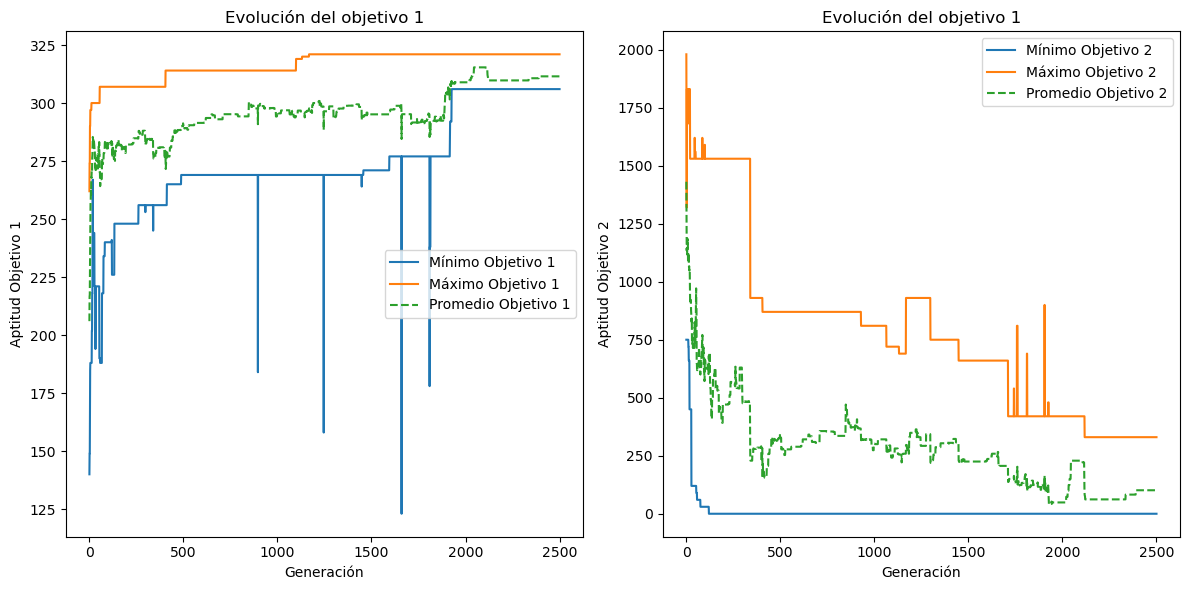

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# Acceder al historial completo de estadísticas
gen = stats.select("gen")
min_fit_values_obj1_history = [x[0] for x in stats.select("min")]
max_fit_values_obj1_history = [x[0] for x in stats.select("max")]
avg_fit_values_obj1_history = [x[0] for x in stats.select("avg")]

min_fit_values_obj2_history = [x[1] for x in stats.select("min")]
max_fit_values_obj2_history = [x[1] for x in stats.select("max")]
avg_fit_values_obj2_history = [x[1] for x in stats.select("avg")]

# Crear una figura con dos subgráficas en dos columnas
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Gráfica para el primer objetivo (sin escala logarítmica)
axes[0].plot(gen, min_fit_values_obj1_history, label="Mínimo Objetivo 1", linestyle='-')
axes[0].plot(gen, max_fit_values_obj1_history, label="Máximo Objetivo 1", linestyle='-')
axes[0].plot(gen, avg_fit_values_obj1_history, label="Promedio Objetivo 1", linestyle='--')

axes[0].set_xlabel("Generación")
axes[0].set_ylabel("Aptitud Objetivo 1")
axes[0].set_title("Evolución del objetivo 1")
axes[0].legend()

# Gráfica para el segundo objetivo (sin escala logarítmica)
axes[1].plot(gen, min_fit_values_obj2_history, label="Mínimo Objetivo 2", linestyle='-')
axes[1].plot(gen, max_fit_values_obj2_history, label="Máximo Objetivo 2", linestyle='-')
axes[1].plot(gen, avg_fit_values_obj2_history, label="Promedio Objetivo 2", linestyle='--')

axes[1].set_xlabel("Generación")
axes[1].set_ylabel("Aptitud Objetivo 2")
axes[1].set_title("Evolución del objetivo 1")
axes[1].legend()

plt.tight_layout()
plt.show()


In [ ]:
def generate_schedule_visual(solution, tareas_df):
    """
    Generar un horario visual con las fechas asignadas a cada tarea en la solución.
    """
    schedule = ""  # Crear un horario vacío
    days = ["Lunes", "Martes", "Miércoles", "Jueves", "Viernes", "Sábado", "Domingo"]
    
    for index, tarea in enumerate(solution):
        if tarea != 0:
            tarea_info = tareas_df[tareas_df["ID"] == tarea].iloc[0]
            schedule += f"{index_to_date(index)} - {tarea_info['Nombre de la Tarea']}\n"
    
    return schedule

schedule_visual = generate_schedule_visual(best_carta, tareas_df)

print(schedule_visual)


In [23]:
from reportlab.lib.pagesizes import A4
from reportlab.platypus import SimpleDocTemplate, Table, TableStyle, Paragraph
from reportlab.lib import colors
from reportlab.lib.styles import getSampleStyleSheet
import numpy as np
import random

def planificacion_to_pdf(planificacion_1d, pdf_name, colours=False):
    # Convertir la planificación 1D a 2D
    planificacion_2d = np.empty((30, 7), dtype=int)
    for i in range(7):
        planificacion_2d[:, i] = planificacion_1d[30 * i : 30 * (i + 1)]

    # Crear el PDF con tamaño A4 y orientación vertical (normal)
    doc = SimpleDocTemplate(pdf_name, pagesize=A4)
    elements = []

    # Estilos de párrafo
    styles = getSampleStyleSheet()

    # Encabezado de días de la semana
    header = ["Hora/Día"] + ["Lunes", "Martes", "Miércoles", "Jueves", "Viernes", "Sábado", "Domingo"]

    # Agregar números incrementales a la izquierda
    data = []
    for i, row in enumerate(planificacion_2d.tolist()):
        tarea_names = [tareas_df[tareas_df['ID'] == id]['Nombre de la Tarea'].iloc[0] if id != 0 else "" for id in row]
        data.append([index_to_date(i, only_hour=True)] + [Paragraph(tarea, styles['Normal']) for tarea in tarea_names])

    # Crear la tabla con los datos y el encabezado
    data.insert(0, header)
    table = Table(data, colWidths=70)  # Ancho fijo para cada columna

    # Aplicar estilo a la tabla
    style = TableStyle([('BACKGROUND', (0, 0), (-1, 0), colors.HexColor("#3498db")),  # Encabezado
                        ('TEXTCOLOR', (0, 0), (-1, 0), colors.whitesmoke),
                        ('ALIGN', (0, 0), (-1, -1), 'CENTER'),
                        ('VALIGN', (0, 0), (-1, -1), 'MIDDLE'),
                        ('FONTNAME', (0, 0), (-1, 0), 'Helvetica-Bold'),
                        ('BOTTOMPADDING', (0, 0), (-1, 0), 12),
                        ('BACKGROUND', (0, 1), (-1, -1), colors.HexColor("#ecf0f1")),
                        ('GRID', (0, 0), (-1, -1), 1, colors.black)])

    # Colorear celdas según el ID de tarea
    if colours:
        task_colors = {}
        for col in range(1, len(data[0])):
            for row in range(1, len(data)):
                tarea_id = planificacion_2d[row - 1, col - 1]
                if tarea_id != 0:
                    if tarea_id not in task_colors:
                        task_colors[tarea_id] = colors.HexColor("#{:06x}".format(random.randint(0, 0xFFFFFF)))
                    style.add('BACKGROUND', (col, row), (col, row), task_colors[tarea_id])

    table.setStyle(style)

    # Agregar la tabla al documento
    elements.append(table)
    doc.build(elements)
    
# Llamada a la función para generar el PDF
pdf_name = "planificacion.pdf"
planificacion_to_pdf(best_carta, pdf_name, True)